<a href="https://colab.research.google.com/github/Aces22/LinearAlgB24/blob/main/src/image_transform_pil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Goal__ Implement linear transformation on image

In [2]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Load the image

- First, you shall download an image from https://github.com/songqsh/ma2071_v01/blob/master/src/wpilogo.png to your local drive
- and upload the image file to this cloud server by clicking the folder icon on left panel in colab

# New Section

In [ ]:
ls

drive/  sample_data/


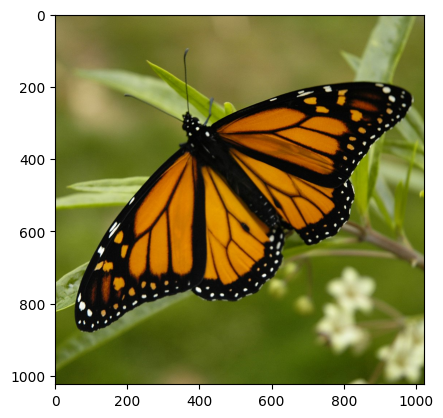

In [4]:
# Define the image file path
image_path = "/content/LinAlgImage.jpeg"
# Load the image
image = Image.open(image_path)
plt.imshow(image)
plt.show()

In [5]:
def image_tranform(image_np, linear_transform):
  # Get the dimensions of the image
  height, width, channels = image_np.shape

  # Define the center
  center_x = width / 2
  center_y = height / 2

  # Loop through each pixel in the image and apply the transformation
  transformed_image = np.zeros_like(image_np)

  for y in range(height):
      for x in range(width):
          # Translate the pixel to the origin
          translated_x = x - center_x
          translated_y = -(y - center_y)

          # Apply the transformation: matrix vector multiplication
          transformed_x, transformed_y = linear_transform@np.array([translated_x, translated_y])

          # Translate the pixel back to its original position
          transformed_x += center_x
          transformed_y = - transformed_y + center_y

          # Round the pixel coordinates to integers
          transformed_x = int(round(transformed_x))
          transformed_y = int(round(transformed_y))

          # Copy the pixel to the transformed image
          if (transformed_x >= 0 and transformed_x < width and
              transformed_y >= 0 and transformed_y < height):
              transformed_image[transformed_y, transformed_x] = image_np[y, x]

  return transformed_image


The dimension of the image_np is (1024, 1024, 3)


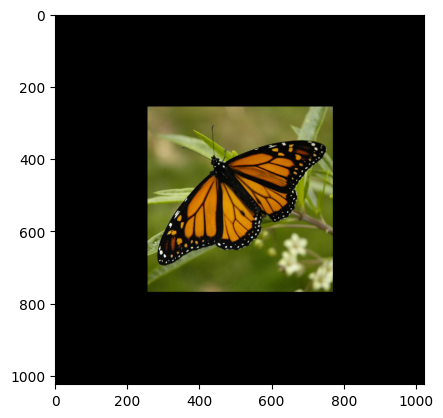

In [7]:
# Convert the image as a numpy array
image_np = np.array(image)
print(f'The dimension of the image_np is {image_np.shape}')
# Define the transformatin matrix
mat = np.array([
    [0.5, 0],
    [0, 0.5]
])
# apply transform
new_image_np = image_tranform(image_np, mat)
# convert a numpy array to image
image1 = Image.fromarray(new_image_np)
plt.imshow(image1)
plt.show()

The dimension of the image_np is (1024, 1024, 3)


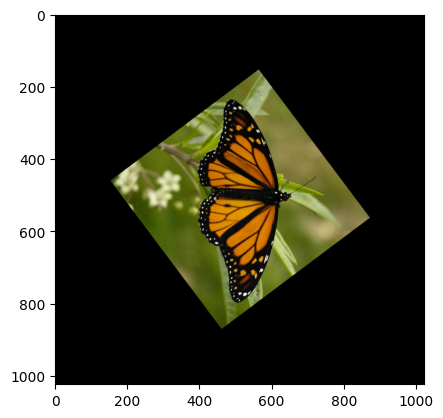

In [8]:
# Convert the image as a numpy array
image_np1 = np.array(image1)
print(f'The dimension of the image_np is {image_np1.shape}')
# Define the transformatin matrix
mat = np.array([
    [-0.6, 0.8],
    [0.8, 0.6]
])
# apply transform
new_image_np1 = image_tranform(image_np1, mat)
# convert a numpy array to image
image2 = Image.fromarray(new_image_np1)
plt.imshow(image2)
plt.show()

The dimension of the image_np is (1024, 1024, 3)


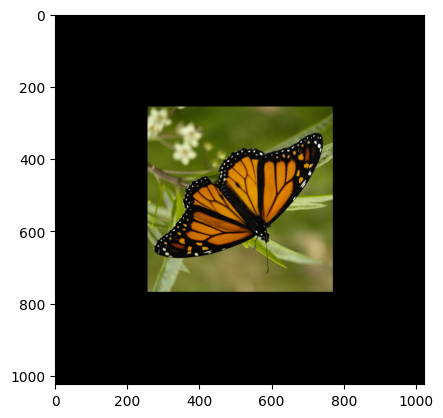

In [9]:
# Convert the image as a numpy array
image_np2 = np.array(image2)
print(f'The dimension of the image_np is {image_np2.shape}')
# Define the transformatin matrix
mat = np.array([
    [0.6, -0.8],
    [-0.8, -0.6]
])
# apply transform
new_image_np2 = image_tranform(image_np2, mat)
# convert a numpy array to image
image3 = Image.fromarray(new_image_np2)
plt.imshow(image3)
plt.show()

The dimension of the image_np is (1024, 1024, 3)


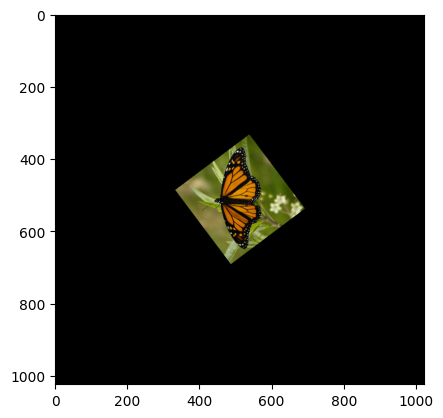

In [11]:
# Convert the image as a numpy array
image_np4 = np.array(image1)
print(f'The dimension of the image_np is {image_np4.shape}')
# Define the transformatin matrix
mat = np.array([
    [0.3, -0.4],
    [-0.4, -0.3]
])
# apply transform
new_image_np4 = image_tranform(image_np4, mat)
# convert a numpy array to image
image_4 = Image.fromarray(new_image_np4)
plt.imshow(image_4)
plt.show()

The dimension of the image_np is (1024, 1024, 3)


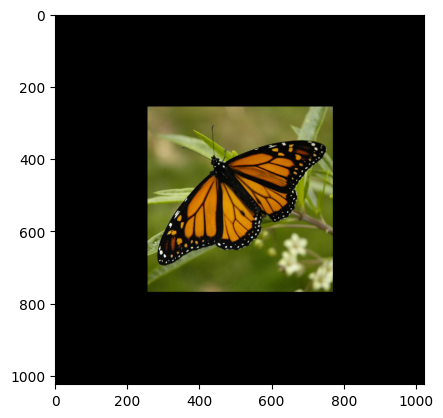

In [12]:
# Convert the image as a numpy array
image_np5 = np.array(image3)
print(f'The dimension of the image_np is {image_np5.shape}')
# Define the transformatin matrix
mat = np.array([
    [-1, 0],
    [0, -1]
])
# apply transform
new_image_np5 = image_tranform(image_np5, mat)
# convert a numpy array to image
image_5 = Image.fromarray(new_image_np5)
plt.imshow(image_5)
plt.show()

The dimension of the image_np is (1024, 1024, 3)


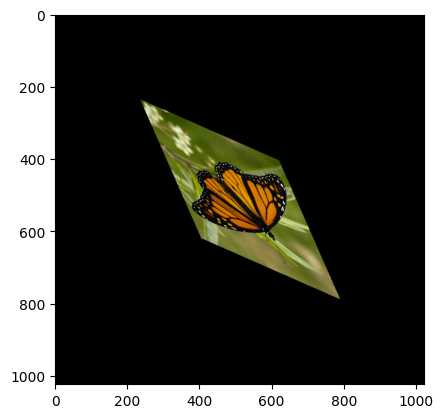

In [14]:
# Convert the image as a numpy array
image_np6 = np.array(image1)
print(f'The dimension of the image_np is {image_np6.shape}')
# Define the transformatin matrix
mat = np.array([
    [-0.75, 0.33],
    [0.33, -0.75]
])
# apply transform
new_image_np6 = image_tranform(image_np6, mat)
# convert a numpy array to image
image4 = Image.fromarray(new_image_np6)
plt.imshow(image4)
plt.show()